<a href="https://colab.research.google.com/github/swaroop112233/Blood-Donation-Prediction/blob/main/Blod_donation_project(major).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost lightgbm pandas numpy scikit-learn


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/transfusion.csv')


In [ ]:
print(df.head())

print(df.isnull().sum())

print(df.describe())


   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  
Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2

In [ ]:
df.dropna(inplace=True)

In [ ]:
features = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df[features] = scaler.fit_transform(df[features])

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)




In [ ]:
X = df[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']]

y = df['whether he/she donated blood in March 2007']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=15, random_state=42)

xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# For LightGBM:
# y_pred = lgb_model.predict(X_test)


Accuracy: 0.74
Precision: 0.4444444444444444
Recall: 0.21621621621621623
F1 Score: 0.2909090909090909


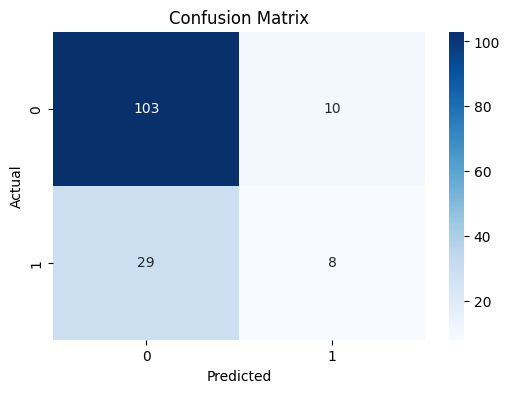

In [ ]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import plot_importance

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 3 folds for each of 75 candidates, totalling 225 fits
Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Score:  0.7960134003350084


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Cross-Validation F1 Scores: [0.40816327 0.44       0.48979592 0.47058824 0.36734694]
Mean F1 Score: 0.43517887154861945
Best Model Parameters: {'subsample': 0.7, 'n_estimators': 260, 'max_depth': 7, 'learning_rate': 0.042222222222222223, 'colsample_bytree': 1.0}
Accuracy: 0.7666666666666667
Precision: 0.5454545454545454
Recall: 0.32432432432432434
F1 Score: 0.4067796610169492


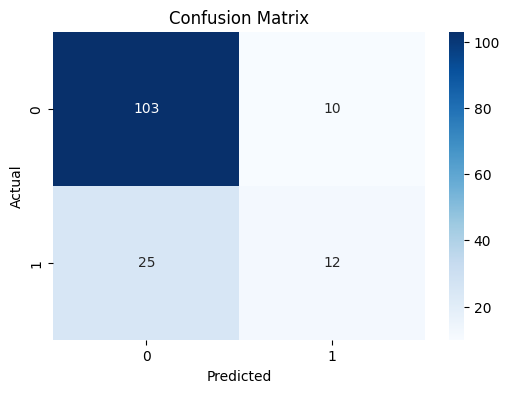

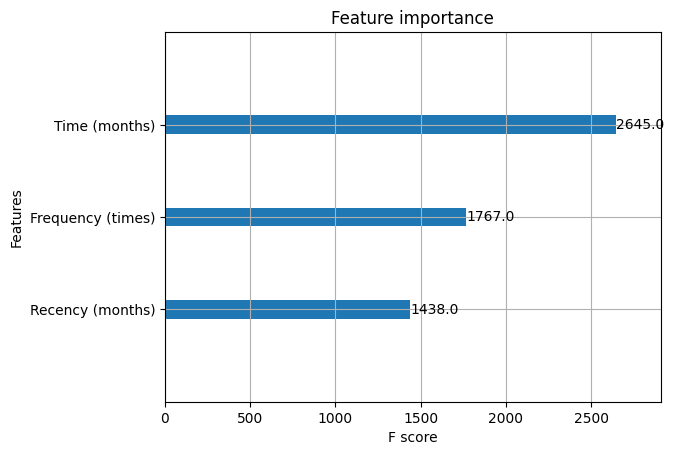

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
import numpy as np


# Step 4: Handle Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Step 6: Define the Model with Initial Parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 7: Set up Parameter Grid for RandomizedSearchCV with Wider Ranges
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [100, 150, 200, 250, 300],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Step 8: Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Step 9: Retrieve the Best Model from Randomized Search
best_model = random_search.best_estimator_

# Step 10: Evaluate the Best Model with Cross-Validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean()}")

# Step 11: Make Predictions on the Test Set
y_pred = best_model.predict(X_test)

# Step 12: Calculate and Display Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Model Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Step 13: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 14: Plot Feature Importance for the Best Model
plot_importance(best_model)
plt.show()


In [ ]:
# Import necessary library for data handling
import pandas as pd

# Example new data for prediction
# Make sure this DataFrame follows the same structure as the original features
new_data = pd.DataFrame({
    'Recency (months)': [2],  # replace with actual values
    'Frequency (times)': [50],  # replace with actual values
    'Monetary (c.c. blood)': [12500],  # replace with actual values
    'Time (months)': [98]  # replace with actual values
})

# Step 1: Preprocess the New Data (apply scaling as done for training data)
# Use the same scaler that was fit on the training data
new_data_scaled = scaler.transform(new_data)

# Step 2: Use the Best Model to Make Predictions
predictions = best_model.predict(new_data_scaled)

# Step 3: Output Predictions
# Predictions will be in the same form as the target variable (0 or 1 for donation outcome)
print("Predictions for new data:", predictions)


Predictions for new data: [0]


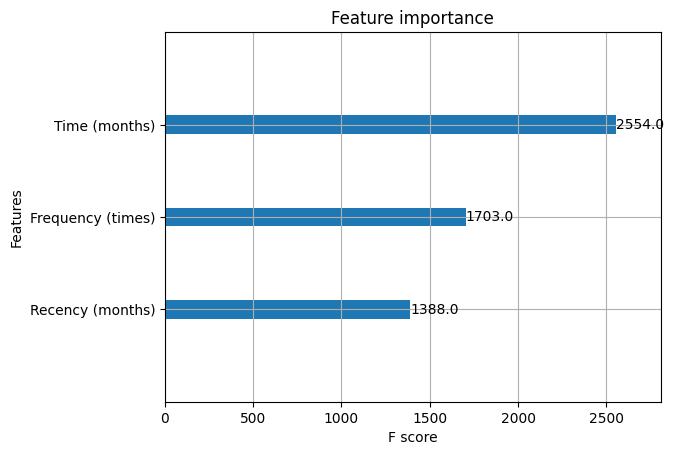

In [ ]:
# Import the plot_importance function from xgboost
from xgboost import plot_importance

# Plot feature importance
plot_importance(best_model)
plt.show()
